## __Problem Statement:__
Create a detailed report on the monthly weather data by performing text manipulation, data sorting, and visualization to analyze temperature and precipitation trends.

__Data:__
The dataset contains daily observations of temperature and precipitation over a month.

## __Steps to Perform:__

1. Textual manipulation
- Convert 'Day' to a string format with appropriate suffixes (1st, 2nd, 3rd, and so on)
- Classify 'Temperature' into categories (Low, Medium, High) based on predefined thresholds
- Determine if 'Precipitation' falls under 'Light', 'Moderate', or 'Heavy' rainfall

2. Iteration and data aggregation
- Iterate over the DataFrame to calculate weekly averages of temperature and precipitation
- Summarize findings in a new DataFrame

3. Sorting
- Sort the DataFrame by 'Temperature' and 'Precipitation' in ascending and descending order
- Sort the DataFrame by the day of the month

4. Plotting
- Create a line plot for temperature trends
- Create a bar plot to compare precipitation levels across the month

In [65]:
import pandas as pd
import matplotlib.pyplot as plt


In [66]:
#import dataset Weather_data.csv from ../dataset 
df = pd.read_csv('../dataset/Weather_data.csv')
# Display the first 5 rows of the dataset
print(df.head())

   Day  Temperature  Precipitation
0    1    23.232203       2.645556
1    2    25.727840       7.742337
2    3    24.041451       4.561503
3    4    23.173248       5.684339
4    5    21.354822       0.187898


1. Textual manipulation
- Convert 'Day' to a string format with appropriate suffixes (1st, 2nd, 3rd, and so on)

In [67]:
#convert day to ordinal number
def to_ordinal(day):
    if day%100 in {11, 12, 13}:
        suffix = 'th'
    else:
        suffix = {1: 'st', 2: 'nd', 3: 'rd'}.get(day % 10, 'th')
    return str(day) + suffix
df['Ordinal_Day'] = df['Day'].apply(to_ordinal)
df


,Day,Temperature,Precipitation,Ordinal_Day
0,1,23.232203,2.645556,1st
1,2,25.727840,7.742337,2nd
2,3,24.041451,4.561503,3rd
3,4,23.173248,5.684339,4th
4,5,21.354822,0.187898,5th
5,6,24.688412,6.176355,6th
6,7,21.563808,6.120957,7th
7,8,28.376595,6.169340,8th
8,9,29.454941,9.437481,9th
9,10,20.751623,6.818203,10th


- Classify 'Temperature' into categories (Low, Medium, High) based on predefined thresholds

In [68]:
df['Temperature_Category'] = pd.cut(df['Temperature'], bins=[-float('inf'),df['Temperature'].quantile(.33),df['Temperature'].quantile(.66), float('inf')], labels=['low','medium','high'])
df

,Day,Temperature,Precipitation,Ordinal_Day,Temperature_Category
0,1,23.232203,2.645556,1st,medium
1,2,25.727840,7.742337,2nd,medium
2,3,24.041451,4.561503,3rd,medium
3,4,23.173248,5.684339,4th,medium
4,5,21.354822,0.187898,5th,low
5,6,24.688412,6.176355,6th,medium
6,7,21.563808,6.120957,7th,low
7,8,28.376595,6.169340,8th,high
8,9,29.454941,9.437481,9th,high
9,10,20.751623,6.818203,10th,low


- Determine if 'Precipitation' falls under 'Light', 'Moderate', or 'Heavy' rainfall

In [69]:
df['Precipitation_Category'] = pd.cut(df['Precipitation'], bins=[-float('inf'),df['Precipitation'].quantile(.33),df['Precipitation'].quantile(.66), float('inf')], labels=['Light','Moderate','Heavy'])
df

,Day,Temperature,Precipitation,Ordinal_Day,Temperature_Category,Precipitation_Category
0,1,23.232203,2.645556,1st,medium,Light
1,2,25.727840,7.742337,2nd,medium,Heavy
2,3,24.041451,4.561503,3rd,medium,Moderate
3,4,23.173248,5.684339,4th,medium,Moderate
4,5,21.354822,0.187898,5th,low,Light
5,6,24.688412,6.176355,6th,medium,Heavy
6,7,21.563808,6.120957,7th,low,Moderate
7,8,28.376595,6.169340,8th,high,Heavy
8,9,29.454941,9.437481,9th,high,Heavy
9,10,20.751623,6.818203,10th,low,Heavy


2. Iteration and data aggregation
- Iterate over the DataFrame to calculate weekly averages of temperature and precipitation
- Summarize findings in a new DataFrame

In [70]:
df['week'] = pd.cut(df['Day'], bins=[0, 7, 14, 21, 28], labels=['Week 1', 'Week 2', 'Week 3', 'Week 4'])
df_weekly_average = df.groupby('week').agg({'Temperature': 'mean', 'Precipitation': 'mean'}).reset_index()
df_weekly_average

C:\Users\prate\AppData\Local\Temp\ipykernel_9936\223491144.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_weekly_average = df.groupby('week').agg({'Temperature': 'mean', 'Precipitation': 'mean'}).reset_index()


,week,Temperature,Precipitation
0,Week 1,23.397398,4.731278
1,Week 2,25.828154,5.424141
2,Week 3,22.795266,4.180070
3,Week 4,23.330110,4.008009


3. Sorting
- Sort the DataFrame by 'Temperature' and 'Precipitation' in ascending and descending order
- Sort the DataFrame by the day of the month

In [71]:
df.sort_values(by=['Temperature','Precipitation'], ascending=[True, False])

,Day,Temperature,Precipitation,Ordinal_Day,Temperature_Category,Precipitation_Category,week
16,17,15.303276,2.103826,17th,low,Light,Week 3
14,15,16.065541,6.667667,15th,low,Heavy,Week 3
15,16,16.306939,6.706379,16th,low,Heavy,Week 3
24,25,16.774116,2.088768,25th,low,Light,Week 4
26,27,17.150299,6.531083,27th,low,Heavy,Week 4
9,10,20.751623,6.818203,10th,low,Heavy,Week 2
29,30,21.219929,2.444256,30th,low,Light,NaN
4,5,21.354822,0.187898,5th,low,Light,Week 1
6,7,21.563808,6.120957,7th,low,Moderate,Week 1
22,23,21.922190,9.883738,23rd,low,Heavy,Week 4


In [72]:
df.sort_values(by=['Ordinal_Day'], ascending=[True])

,Day,Temperature,Precipitation,Ordinal_Day,Temperature_Category,Precipitation_Category,week
9,10,20.751623,6.818203,10th,low,Heavy,Week 2
10,11,26.875876,3.595079,11th,high,Moderate,Week 2
11,12,22.933424,4.370320,12th,medium,Moderate,Week 2
12,13,23.520668,6.976312,13th,medium,Heavy,Week 2
13,14,28.883950,0.602255,14th,high,Light,Week 2
14,15,16.065541,6.667667,15th,low,Heavy,Week 3
15,16,16.306939,6.706379,16th,low,Heavy,Week 3
16,17,15.303276,2.103826,17th,low,Light,Week 3
17,18,27.489298,1.289263,18th,high,Light,Week 3
18,19,26.672351,3.154284,19th,medium,Moderate,Week 3


4. Plotting
- Create a line plot for temperature trends
- Create a bar plot to compare precipitation levels across the month

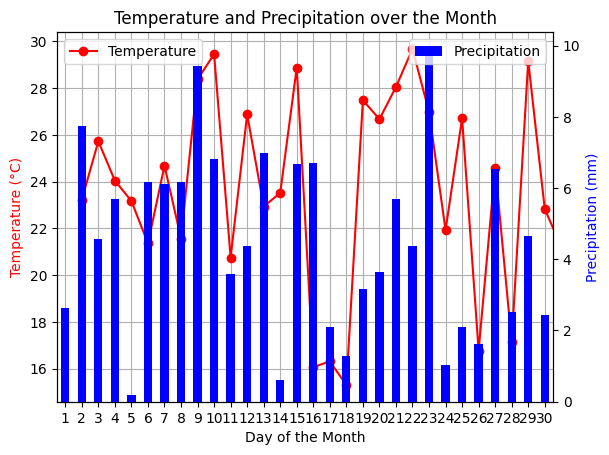

In [77]:
# Combine the plots in the same graph
fig, ax = plt.subplots()
ax2 = ax.twinx()
# Plot temperature
df.plot(x='Day', y='Temperature', label='Temperature', color='red', kind='line', ax=ax, marker = 'o')
# Plot precipitation
df.plot(x='Day', y='Precipitation', label='Precipitation', color='blue', kind='bar', ax=ax2)
# Set the labels and title
ax.set_xlabel('Day of the Month')
ax.set_ylabel('Temperature (°C)', color='red')
ax2.set_ylabel('Precipitation (mm)', color='blue')
ax.set_title('Temperature and Precipitation over the Month')
ax.grid(True)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [74]:
df.sort_values(by=['Temperature_Category','Precipitation_Category'], ascending=[True, False])

,Day,Temperature,Precipitation,Ordinal_Day,Temperature_Category,Precipitation_Category,week
9,10,20.751623,6.818203,10th,low,Heavy,Week 2
14,15,16.065541,6.667667,15th,low,Heavy,Week 3
15,16,16.306939,6.706379,16th,low,Heavy,Week 3
22,23,21.922190,9.883738,23rd,low,Heavy,Week 4
26,27,17.150299,6.531083,27th,low,Heavy,Week 4
6,7,21.563808,6.120957,7th,low,Moderate,Week 1
4,5,21.354822,0.187898,5th,low,Light,Week 1
16,17,15.303276,2.103826,17th,low,Light,Week 3
24,25,16.774116,2.088768,25th,low,Light,Week 4
29,30,21.219929,2.444256,30th,low,Light,NaN


In [80]:
df[['Temperature','Precipitation']].corr()

,Temperature,Precipitation
Temperature,1.000000,-0.093587
Precipitation,-0.093587,1.000000
